#**How to Train YOLOv12 Object Detection Model on a Custom Dataset**

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

**Step 02 # Import All the Requried Libraries**

In [ ]:
import os
import ultralytics
ultralytics.checks()

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/107.7 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


**Step # 03 Download Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eBgSKWqxqcoMZjBA3fAb")
project = rf.workspace("new-workspace-2wuu1").project("pascal-to-yolo-6ftkp")
version = project.version(3)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


**Step # 04 Fine-tune YOLOv12 model on a Custom Dataset**

**NOTE:** We need to make a few changes to our downloaded dataset so it will work with YOLOv12. Run the following bash commands to prepare your dataset for training by updating the relative paths in the `data.yaml` file, ensuring it correctly points to the subdirectories for your dataset's `train`, `test`, and `valid` subsets.

In [ ]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['digit']

roboflow:
  workspace: new-workspace-2wuu1
test: ../test/images
train: ../train/images
val: ../valid/images


We are now ready to fine-tune our YOLOv12 model. In the code below, we initialize the model using a starting checkpoint—here, we use `yolov12s.yaml`, but you can replace it with any other model (e.g., `yolov12n.pt`, `yolov12m.pt`, `yolov12l.pt`, or `yolov12x.pt`) based on your preference. We set the training to run for 50 epochs in this example; however, you should adjust the number of epochs along with other hyperparameters such as batch size, image size, and augmentation settings (scale, mosaic, mixup, and copy-paste) based on your hardware capabilities and dataset size.

**Note:** **Note that after training, you might encounter a `TypeError: argument of type 'PosixPath' is not iterable error` — this is a known issue, but your model weights will still be saved, so you can safely proceed to running inference.**

In [ ]:
model = YOLO("yolo12s.yaml")

In [ ]:
results = model.train(data=f'{dataset.location}/data.yaml', epochs=50)

Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo12s.yaml, data=/content/pascal-to-yolo-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 3.23MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    689408  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

train: Scanning /content/pascal-to-yolo-3/train/labels... 3362 images, 267 backgrounds, 0 corrupt: 100%|██████████| 3362/3362 [00:01<00:00, 1816.93it/s]


train: New cache created: /content/pascal-to-yolo-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/pascal-to-yolo-3/valid/labels... 960 images, 80 backgrounds, 0 corrupt: 100%|██████████| 960/960 [00:00<00:00, 2043.59it/s]

val: New cache created: /content/pascal-to-yolo-3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      5.609      4.427      4.191        141        640:   0%|          | 1/211 [01:03<3:43:59, 64.00s/it]

**Step # 05 Evaluate fine-tuned YOLOv12 model**


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

ls: cannot access '{HOME}/runs/detect/train/': No such file or directory


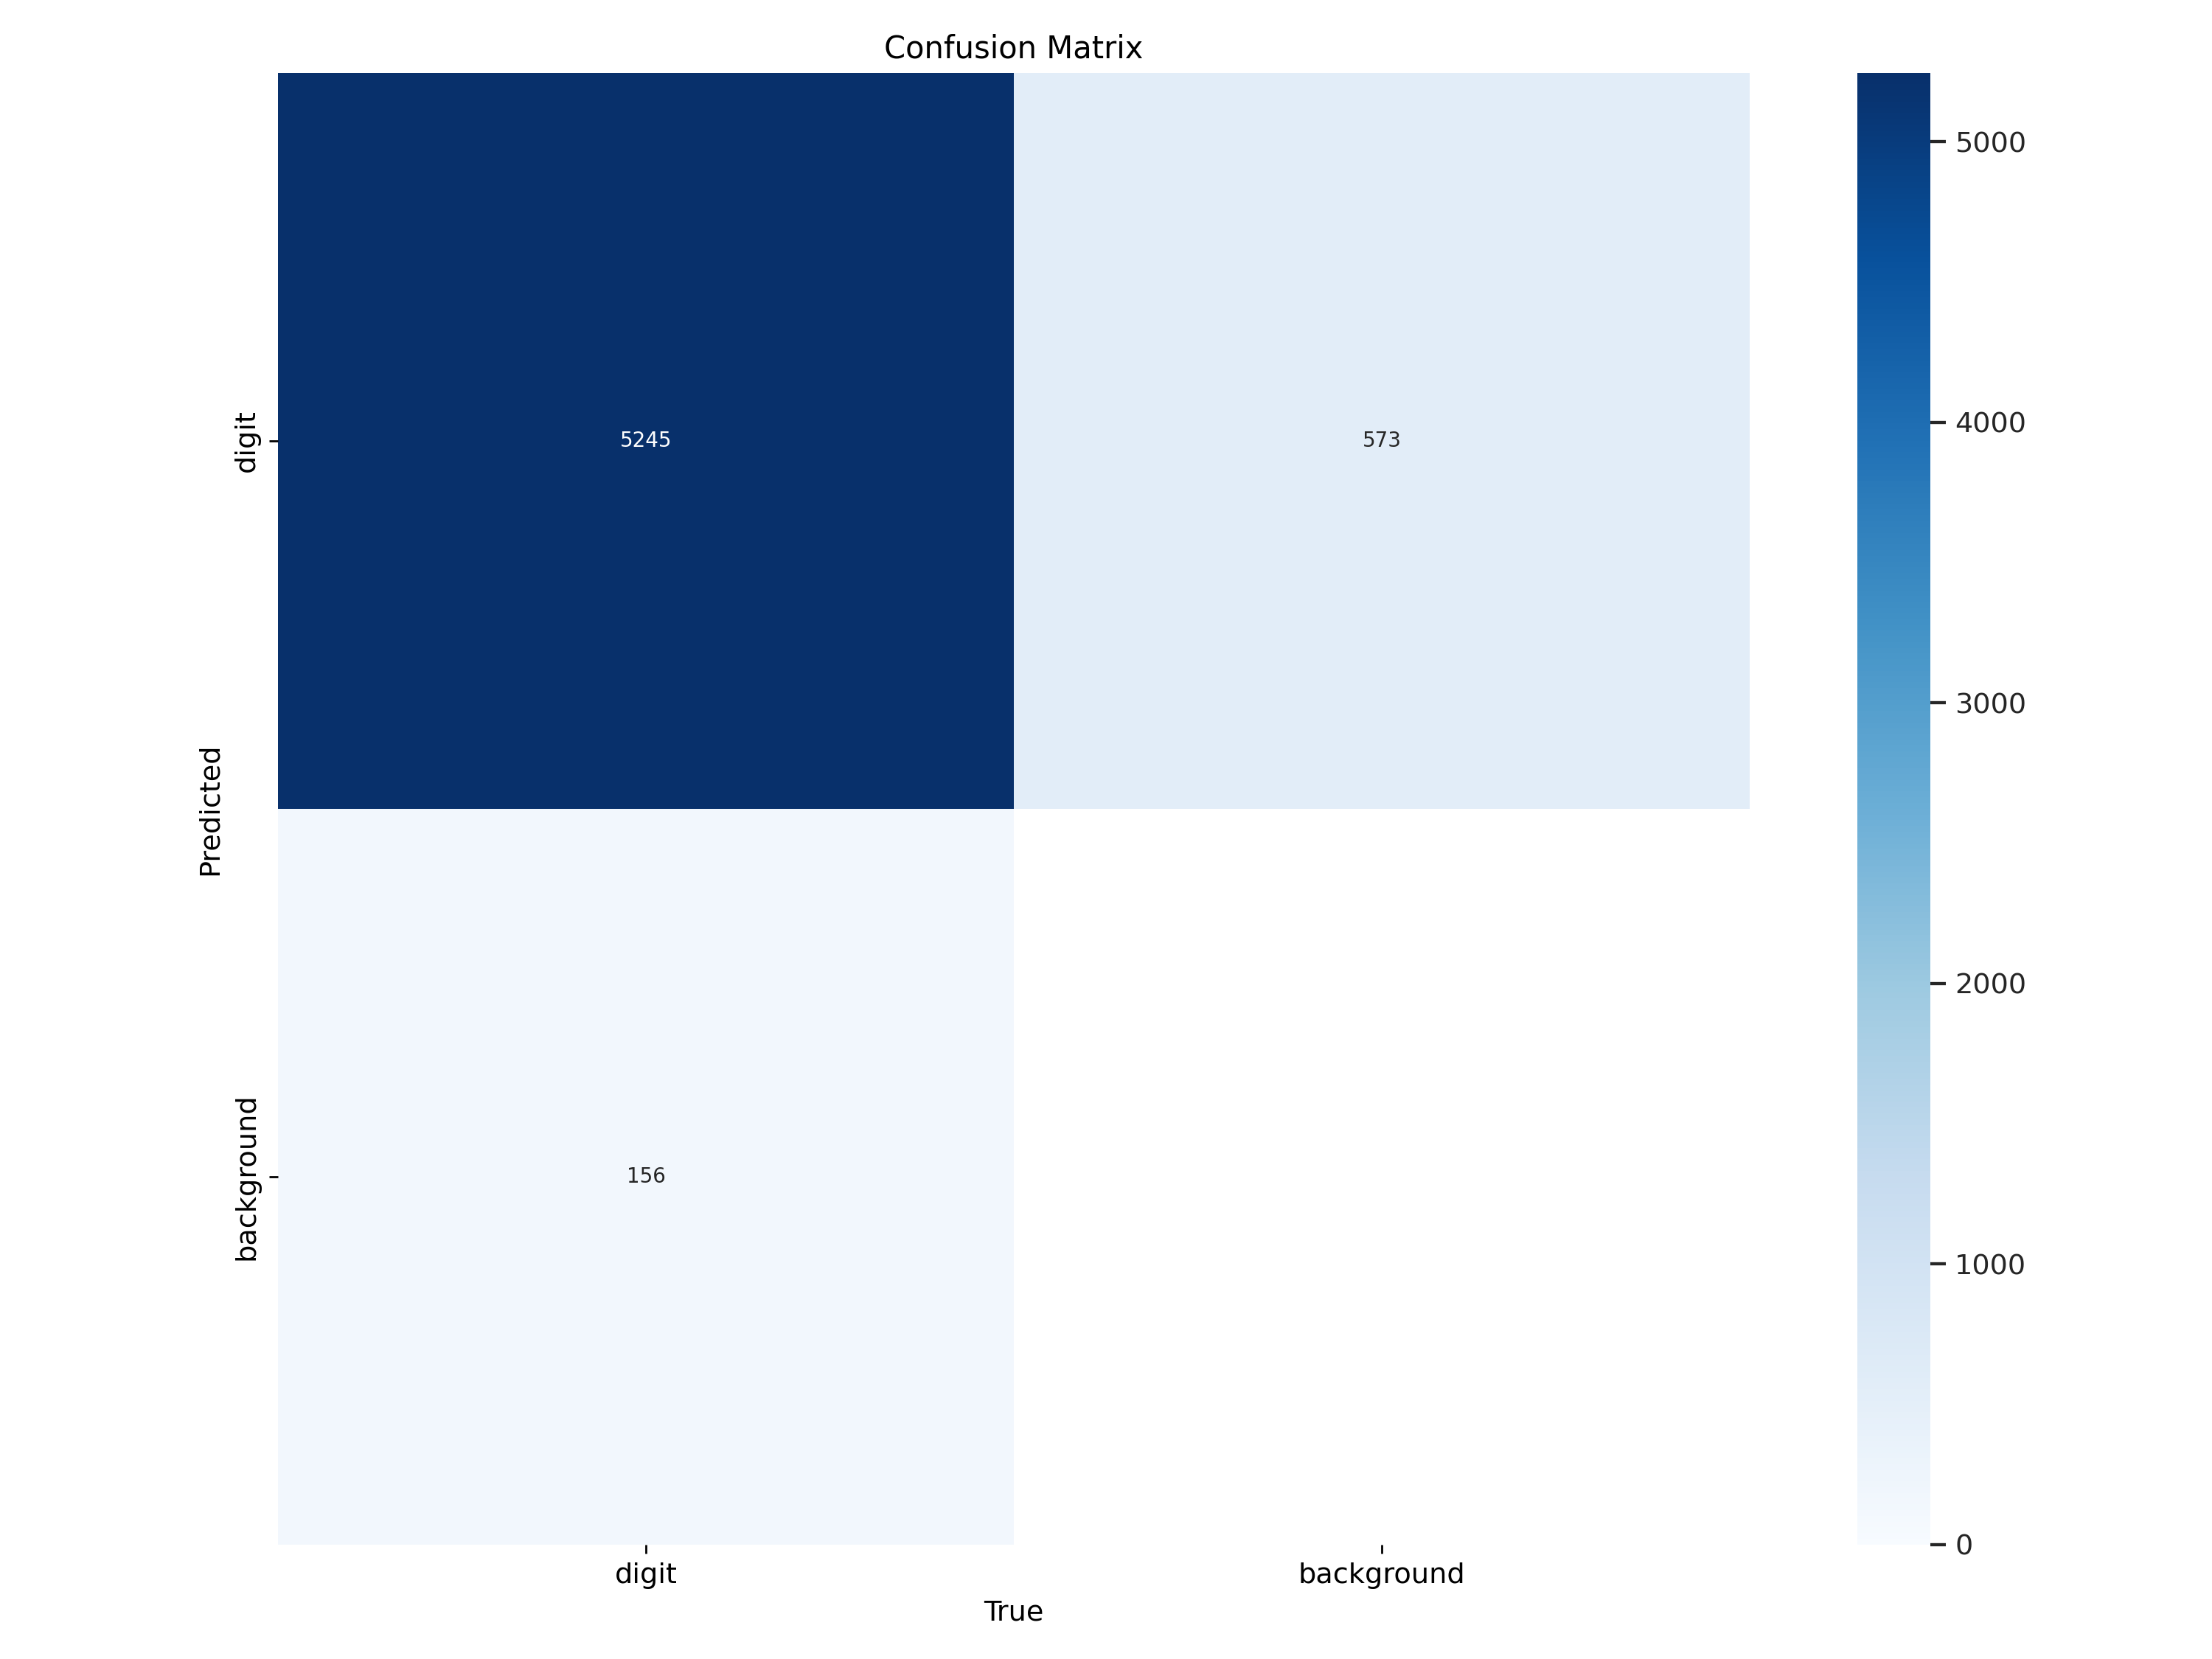

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

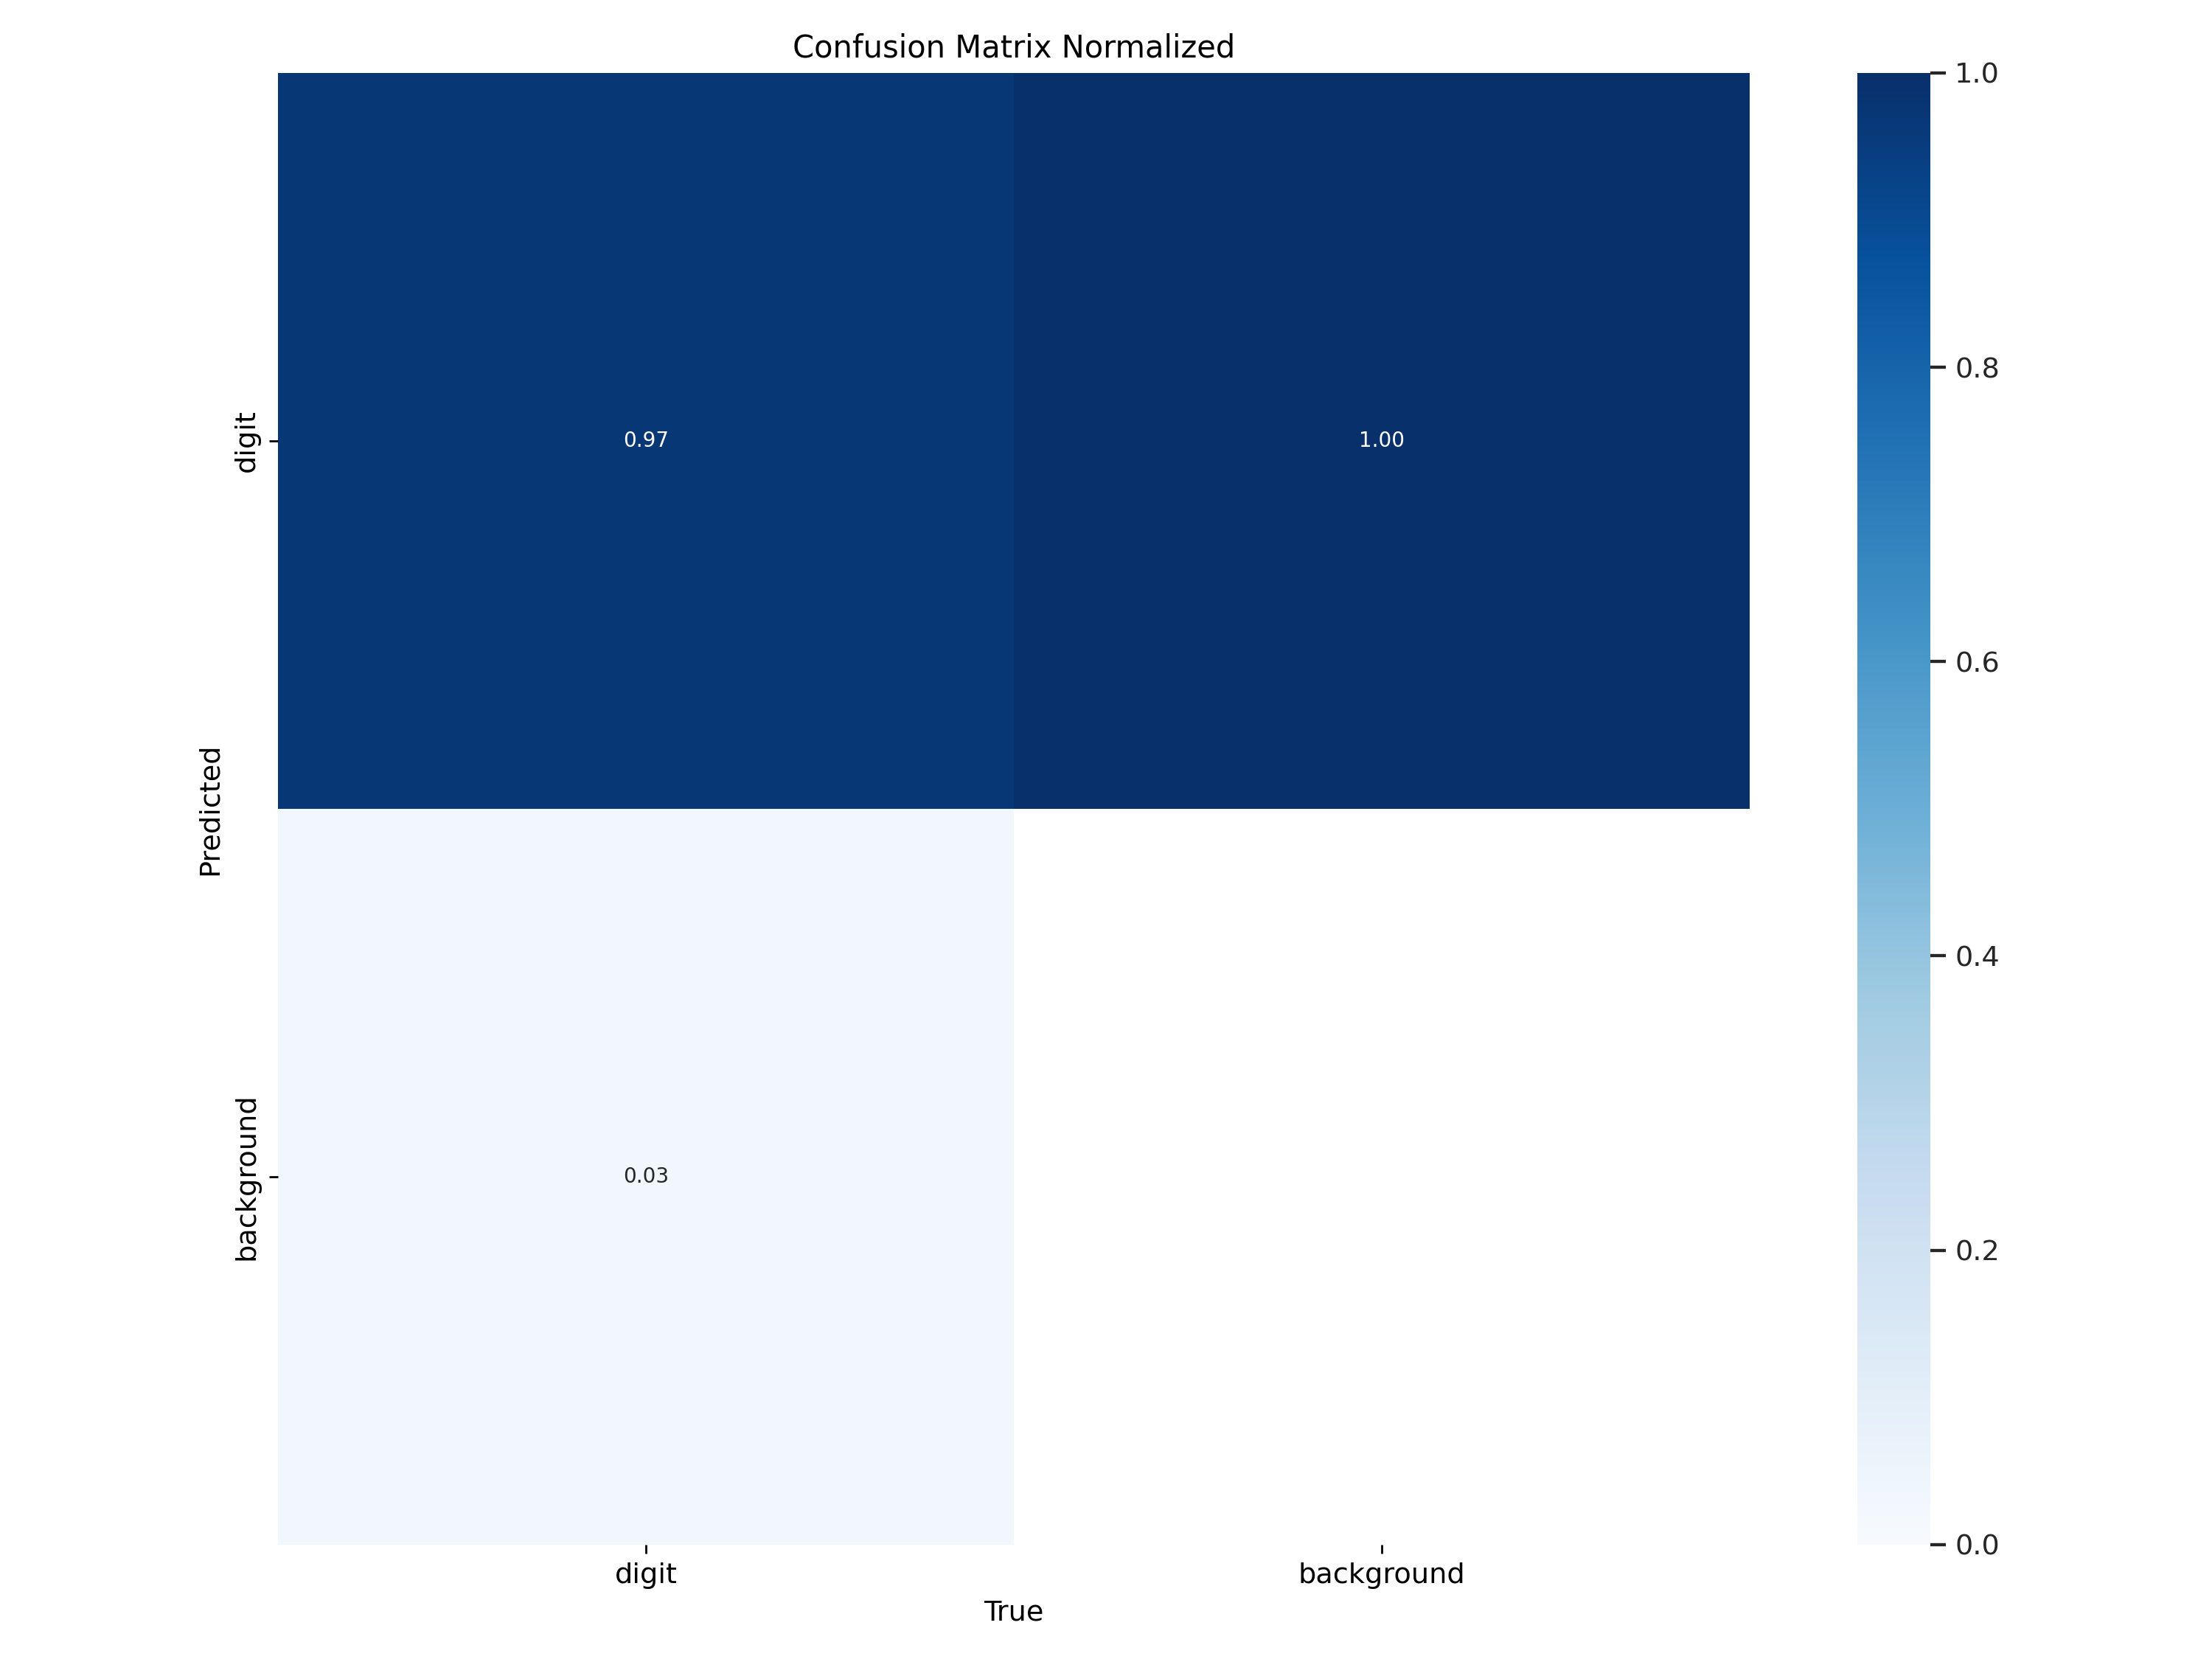

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=1000)

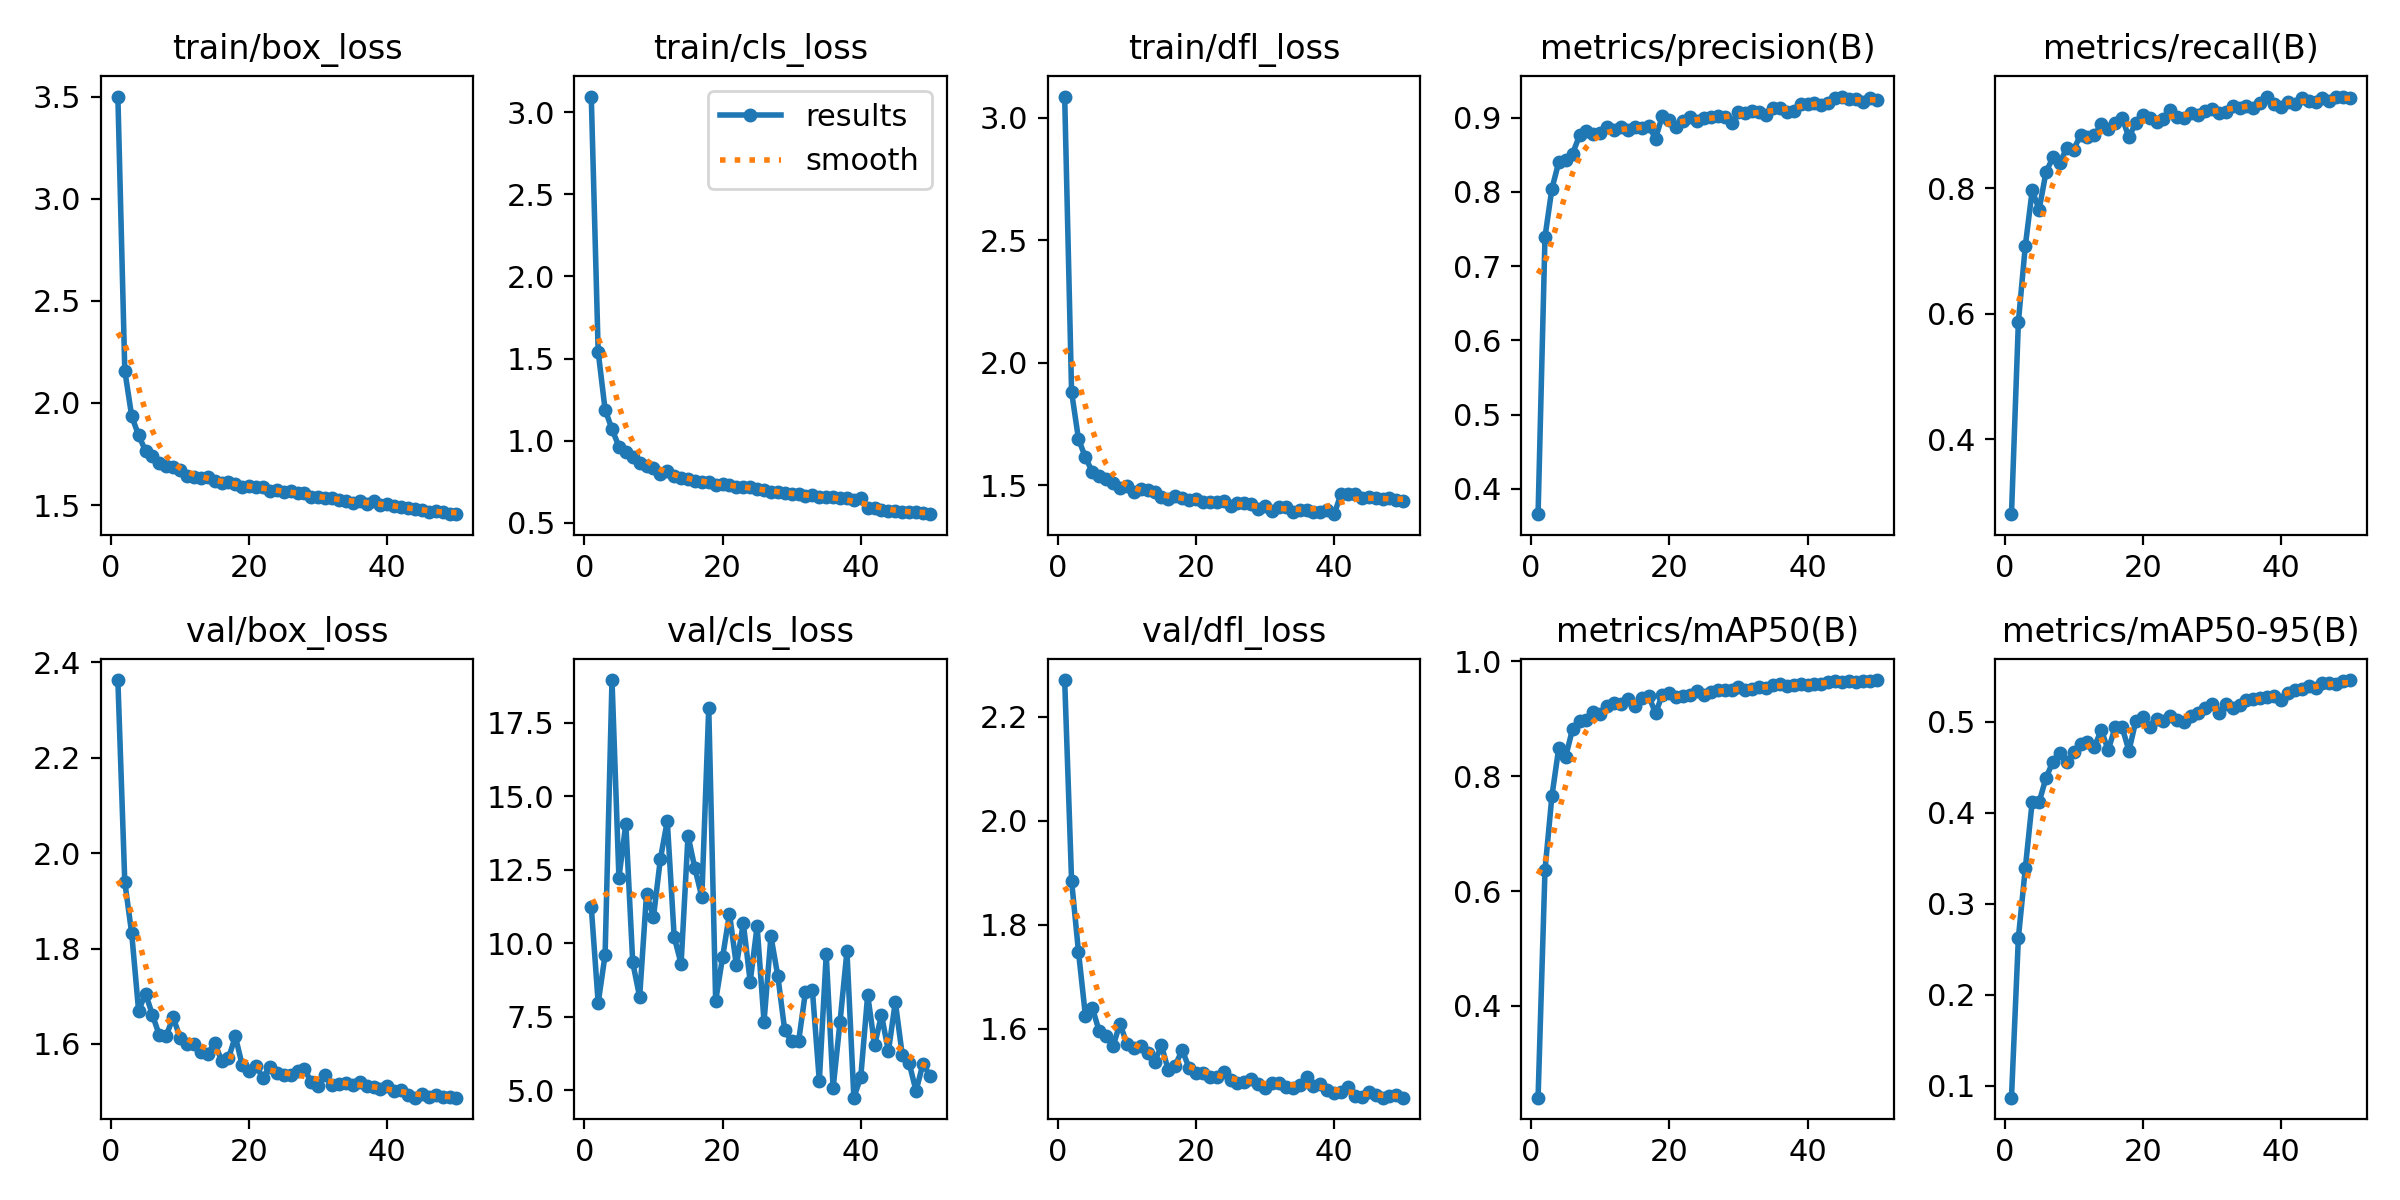

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

Precision = TP / (TP + FP)

Precision is simply true positives out of total detections.


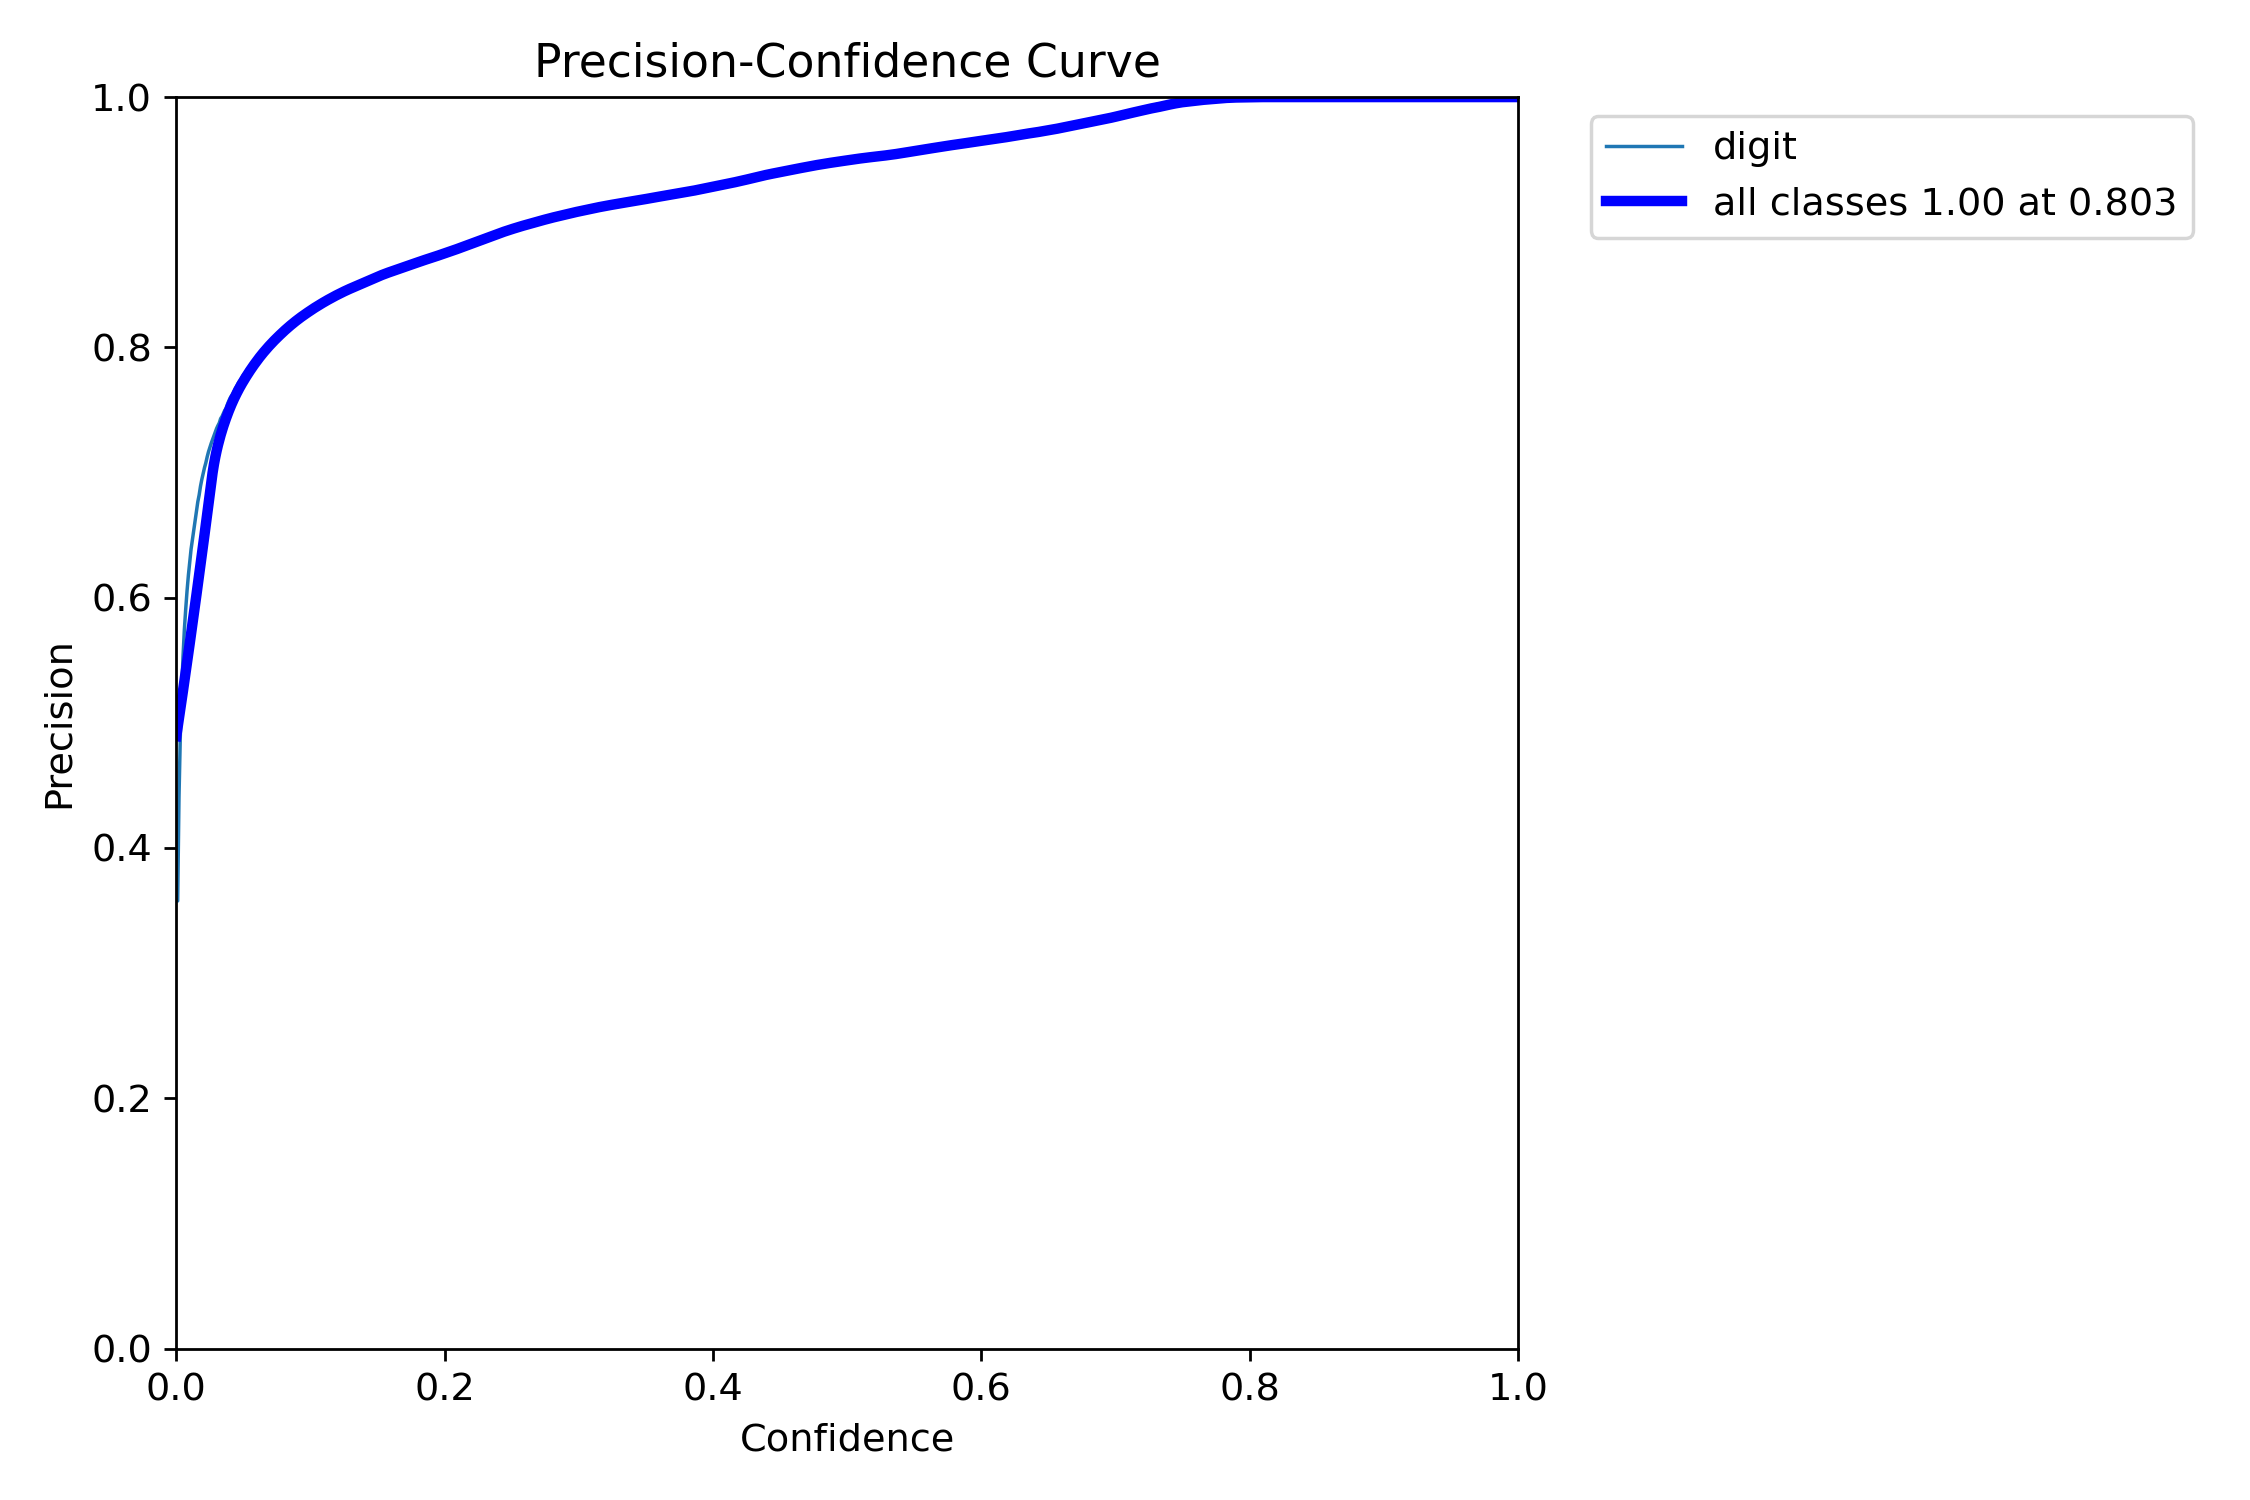

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=1000)

Recall = TP / (TP + FN)

Recall is the True Positive out of all Ground Truths

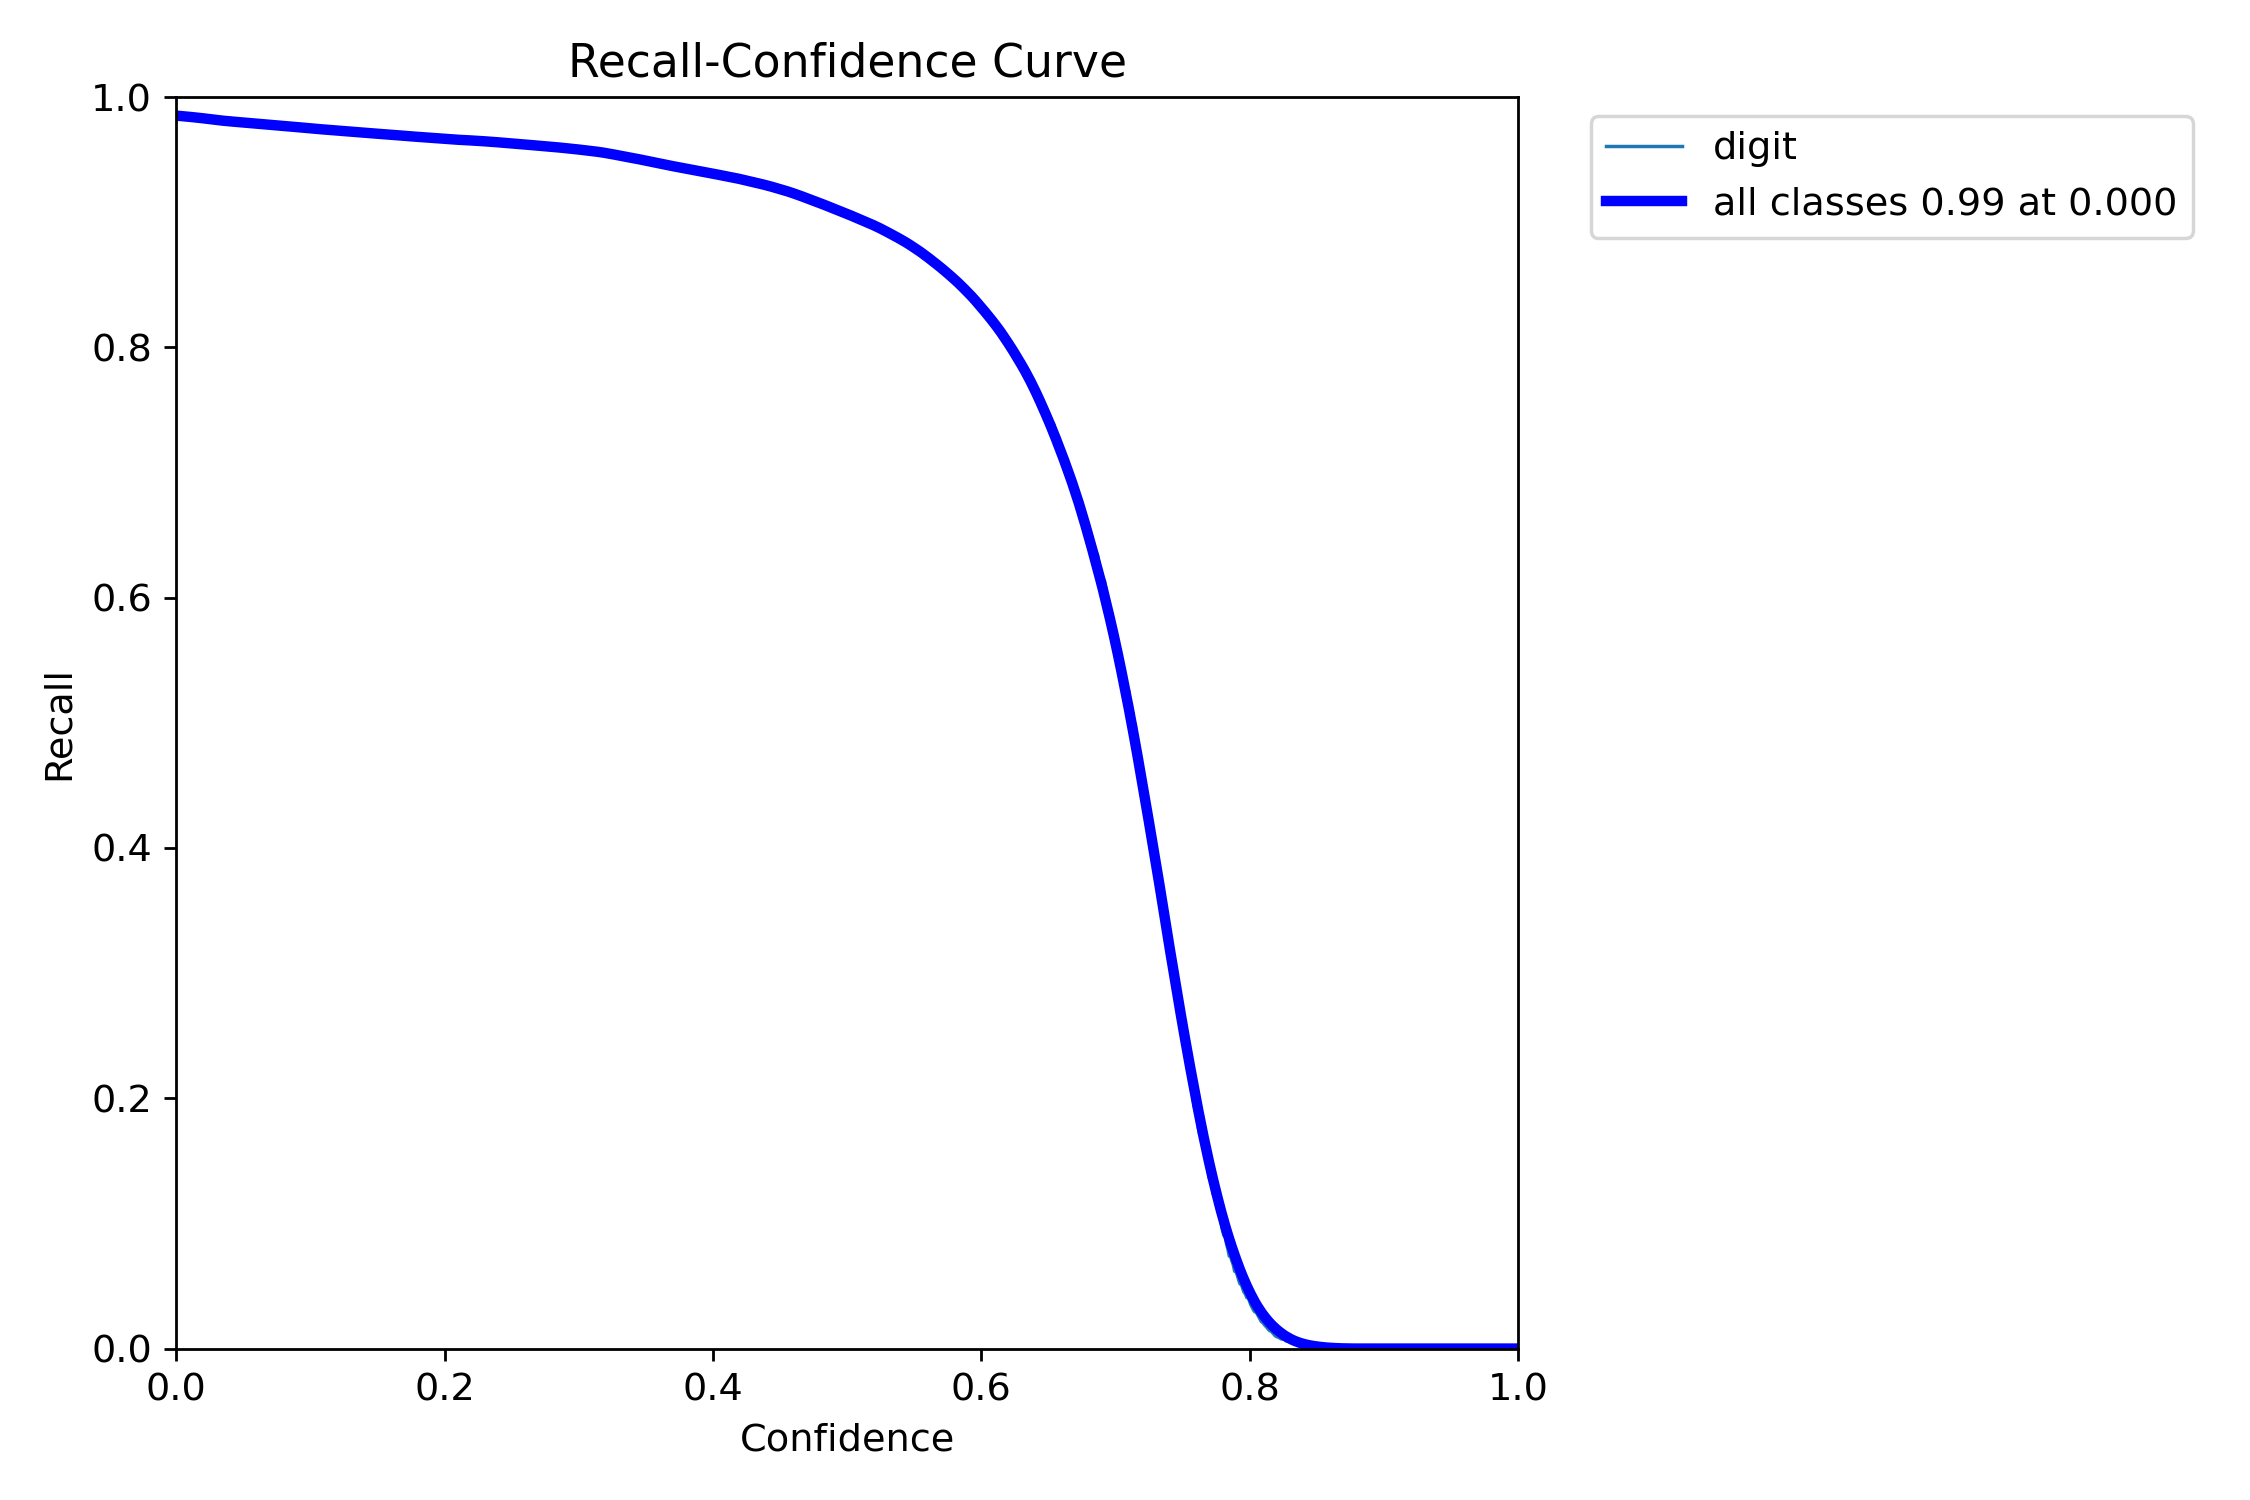

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=1000)

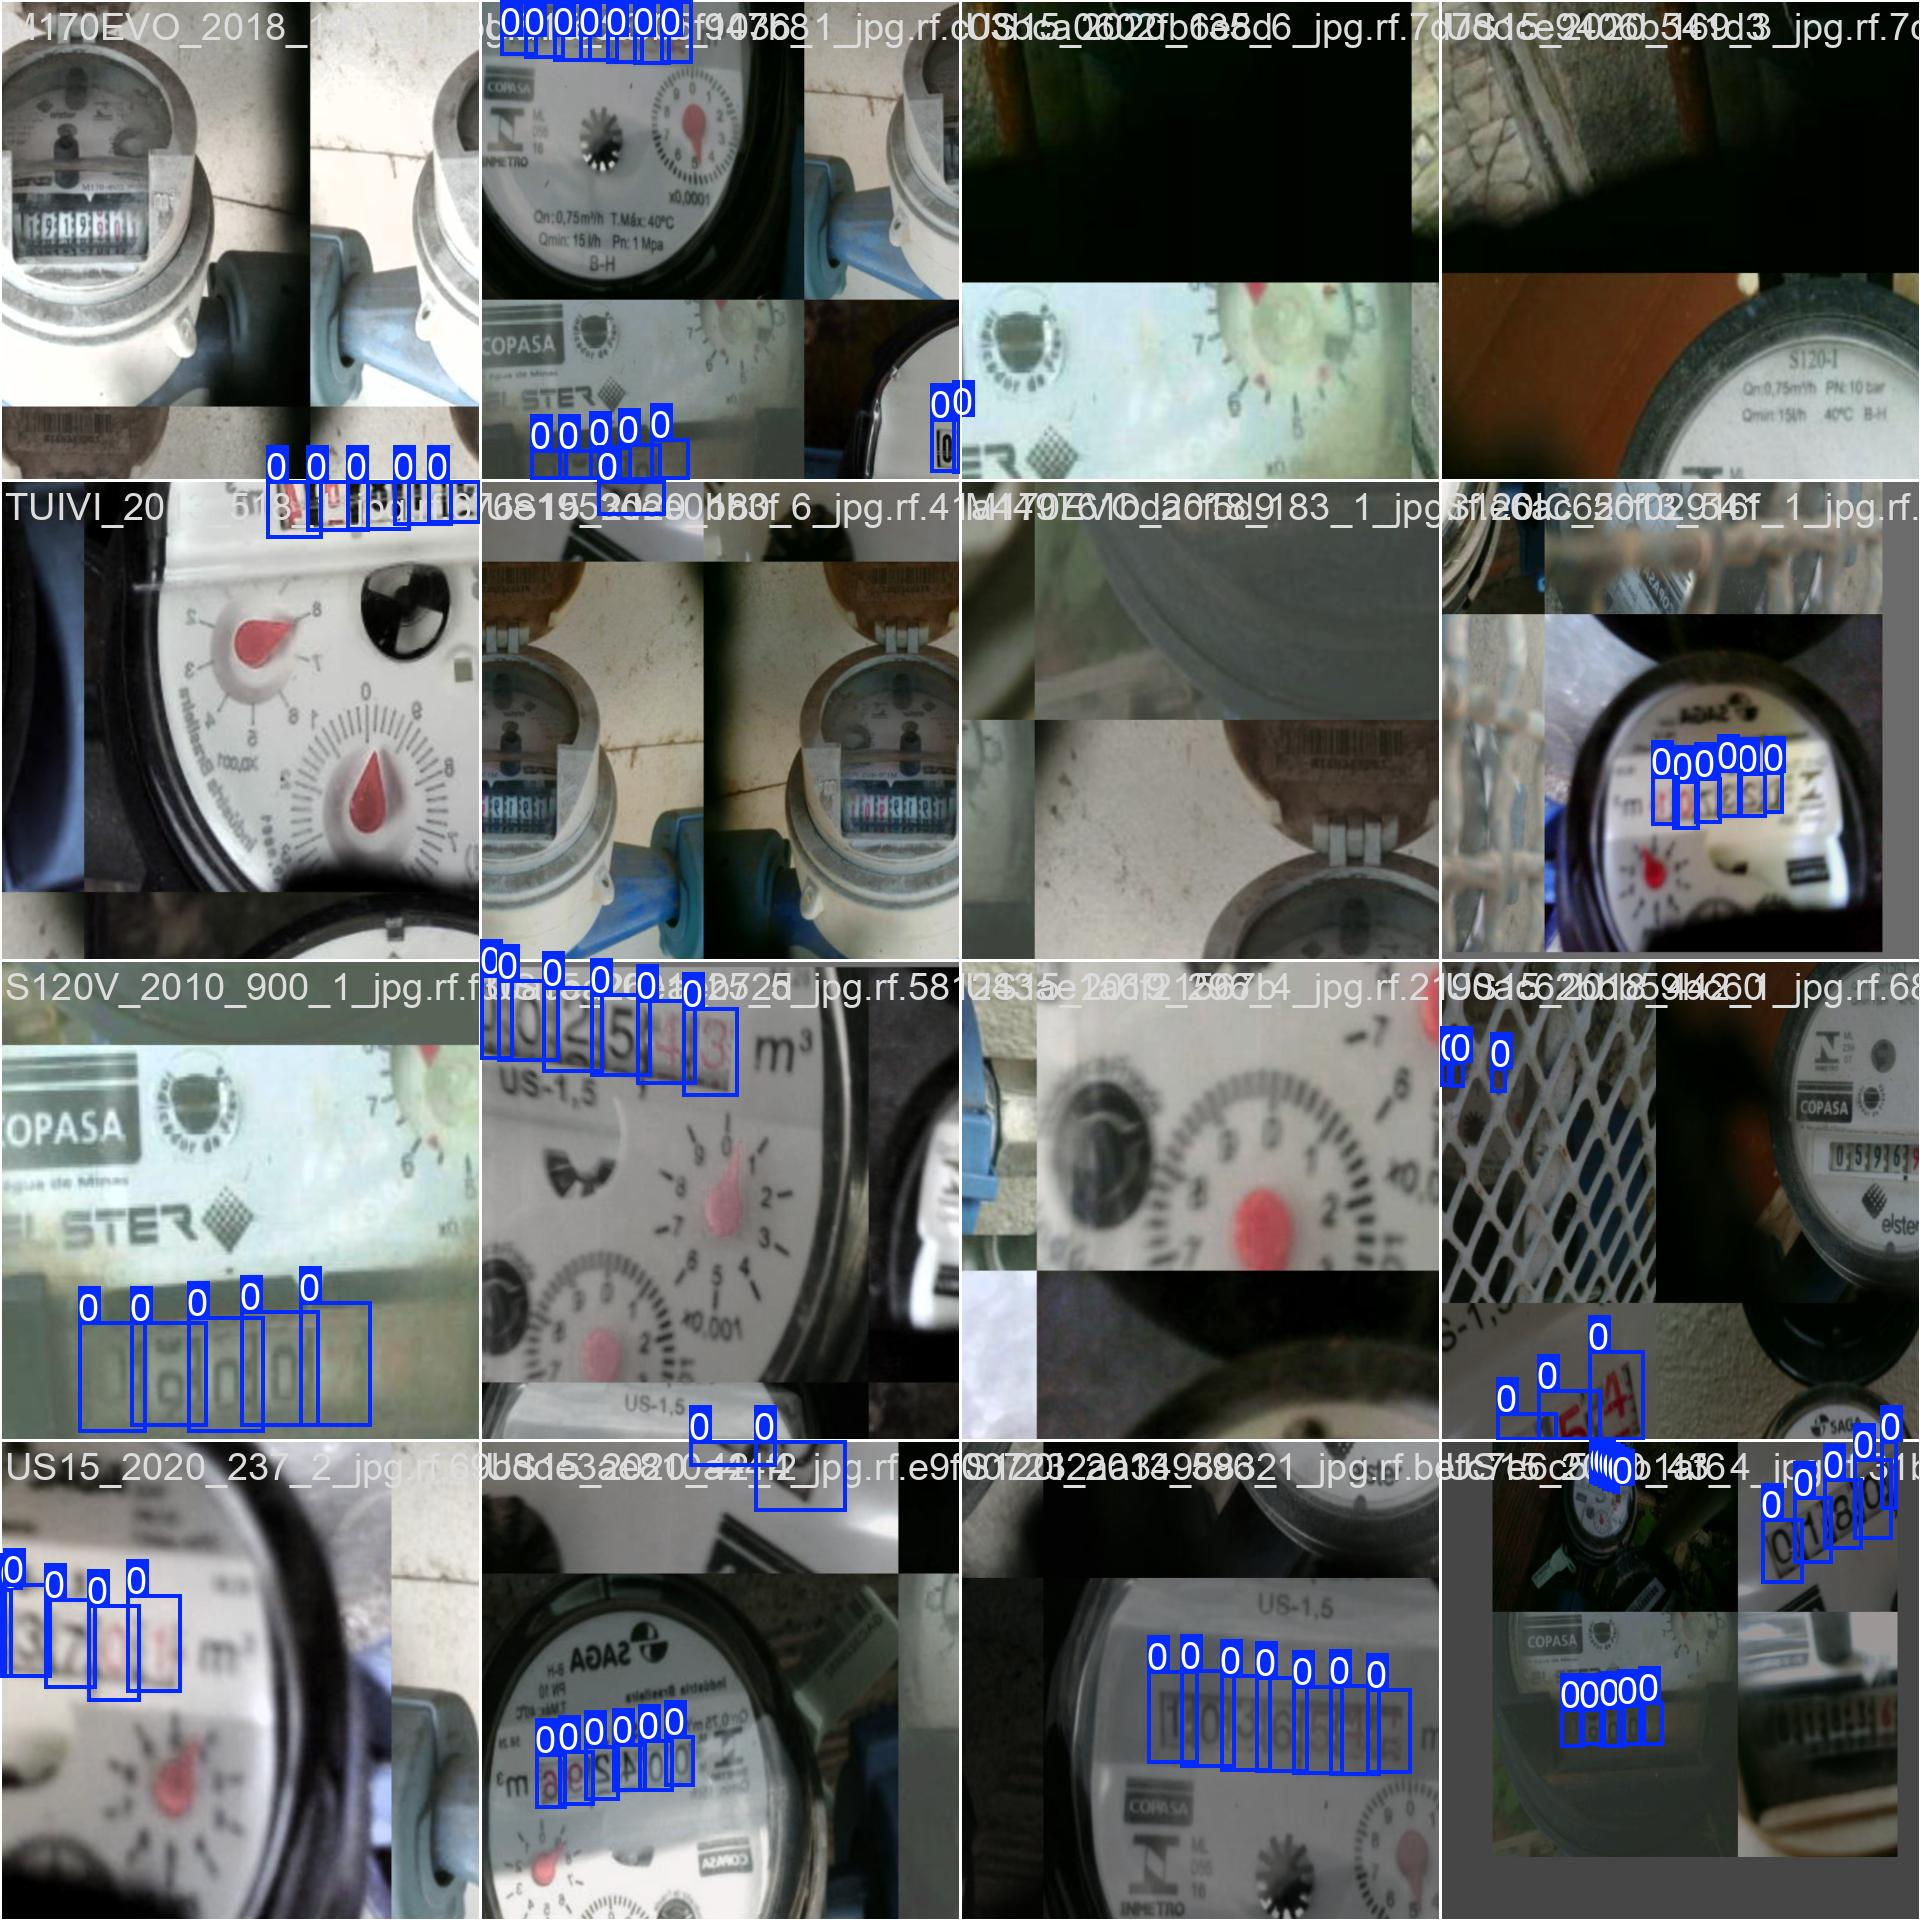

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/train_batch1.jpg', width=1000)

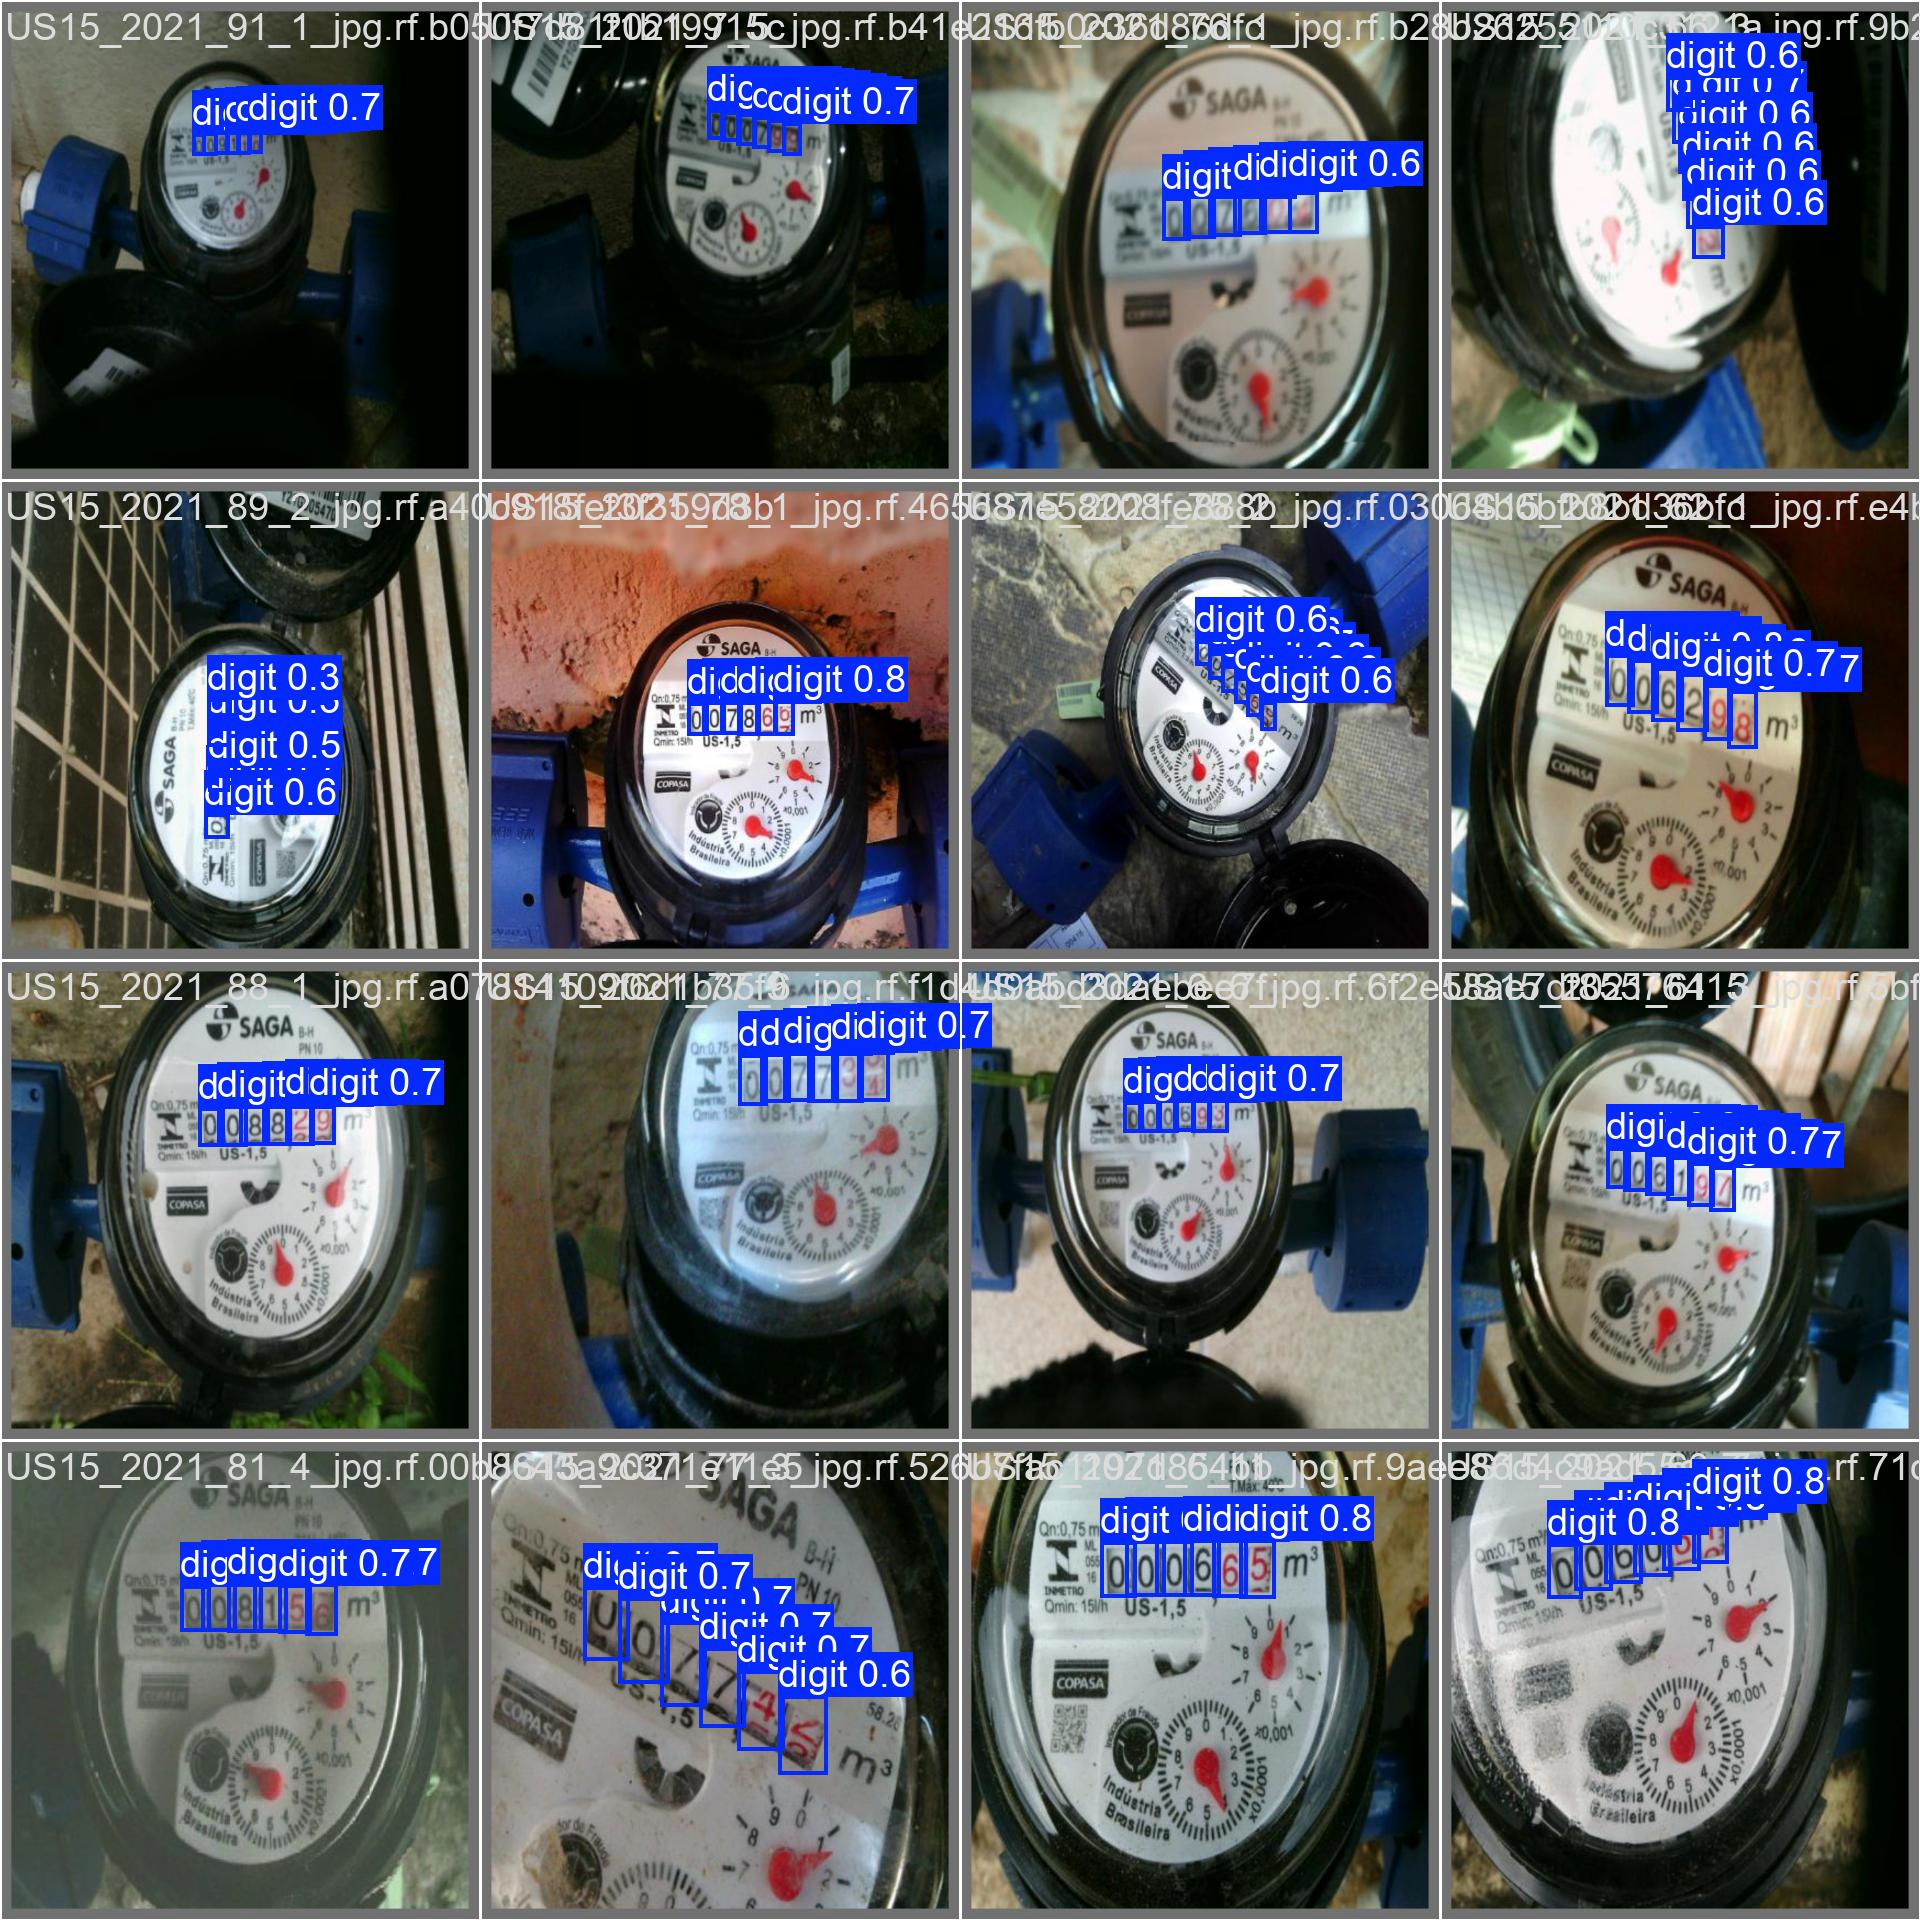

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

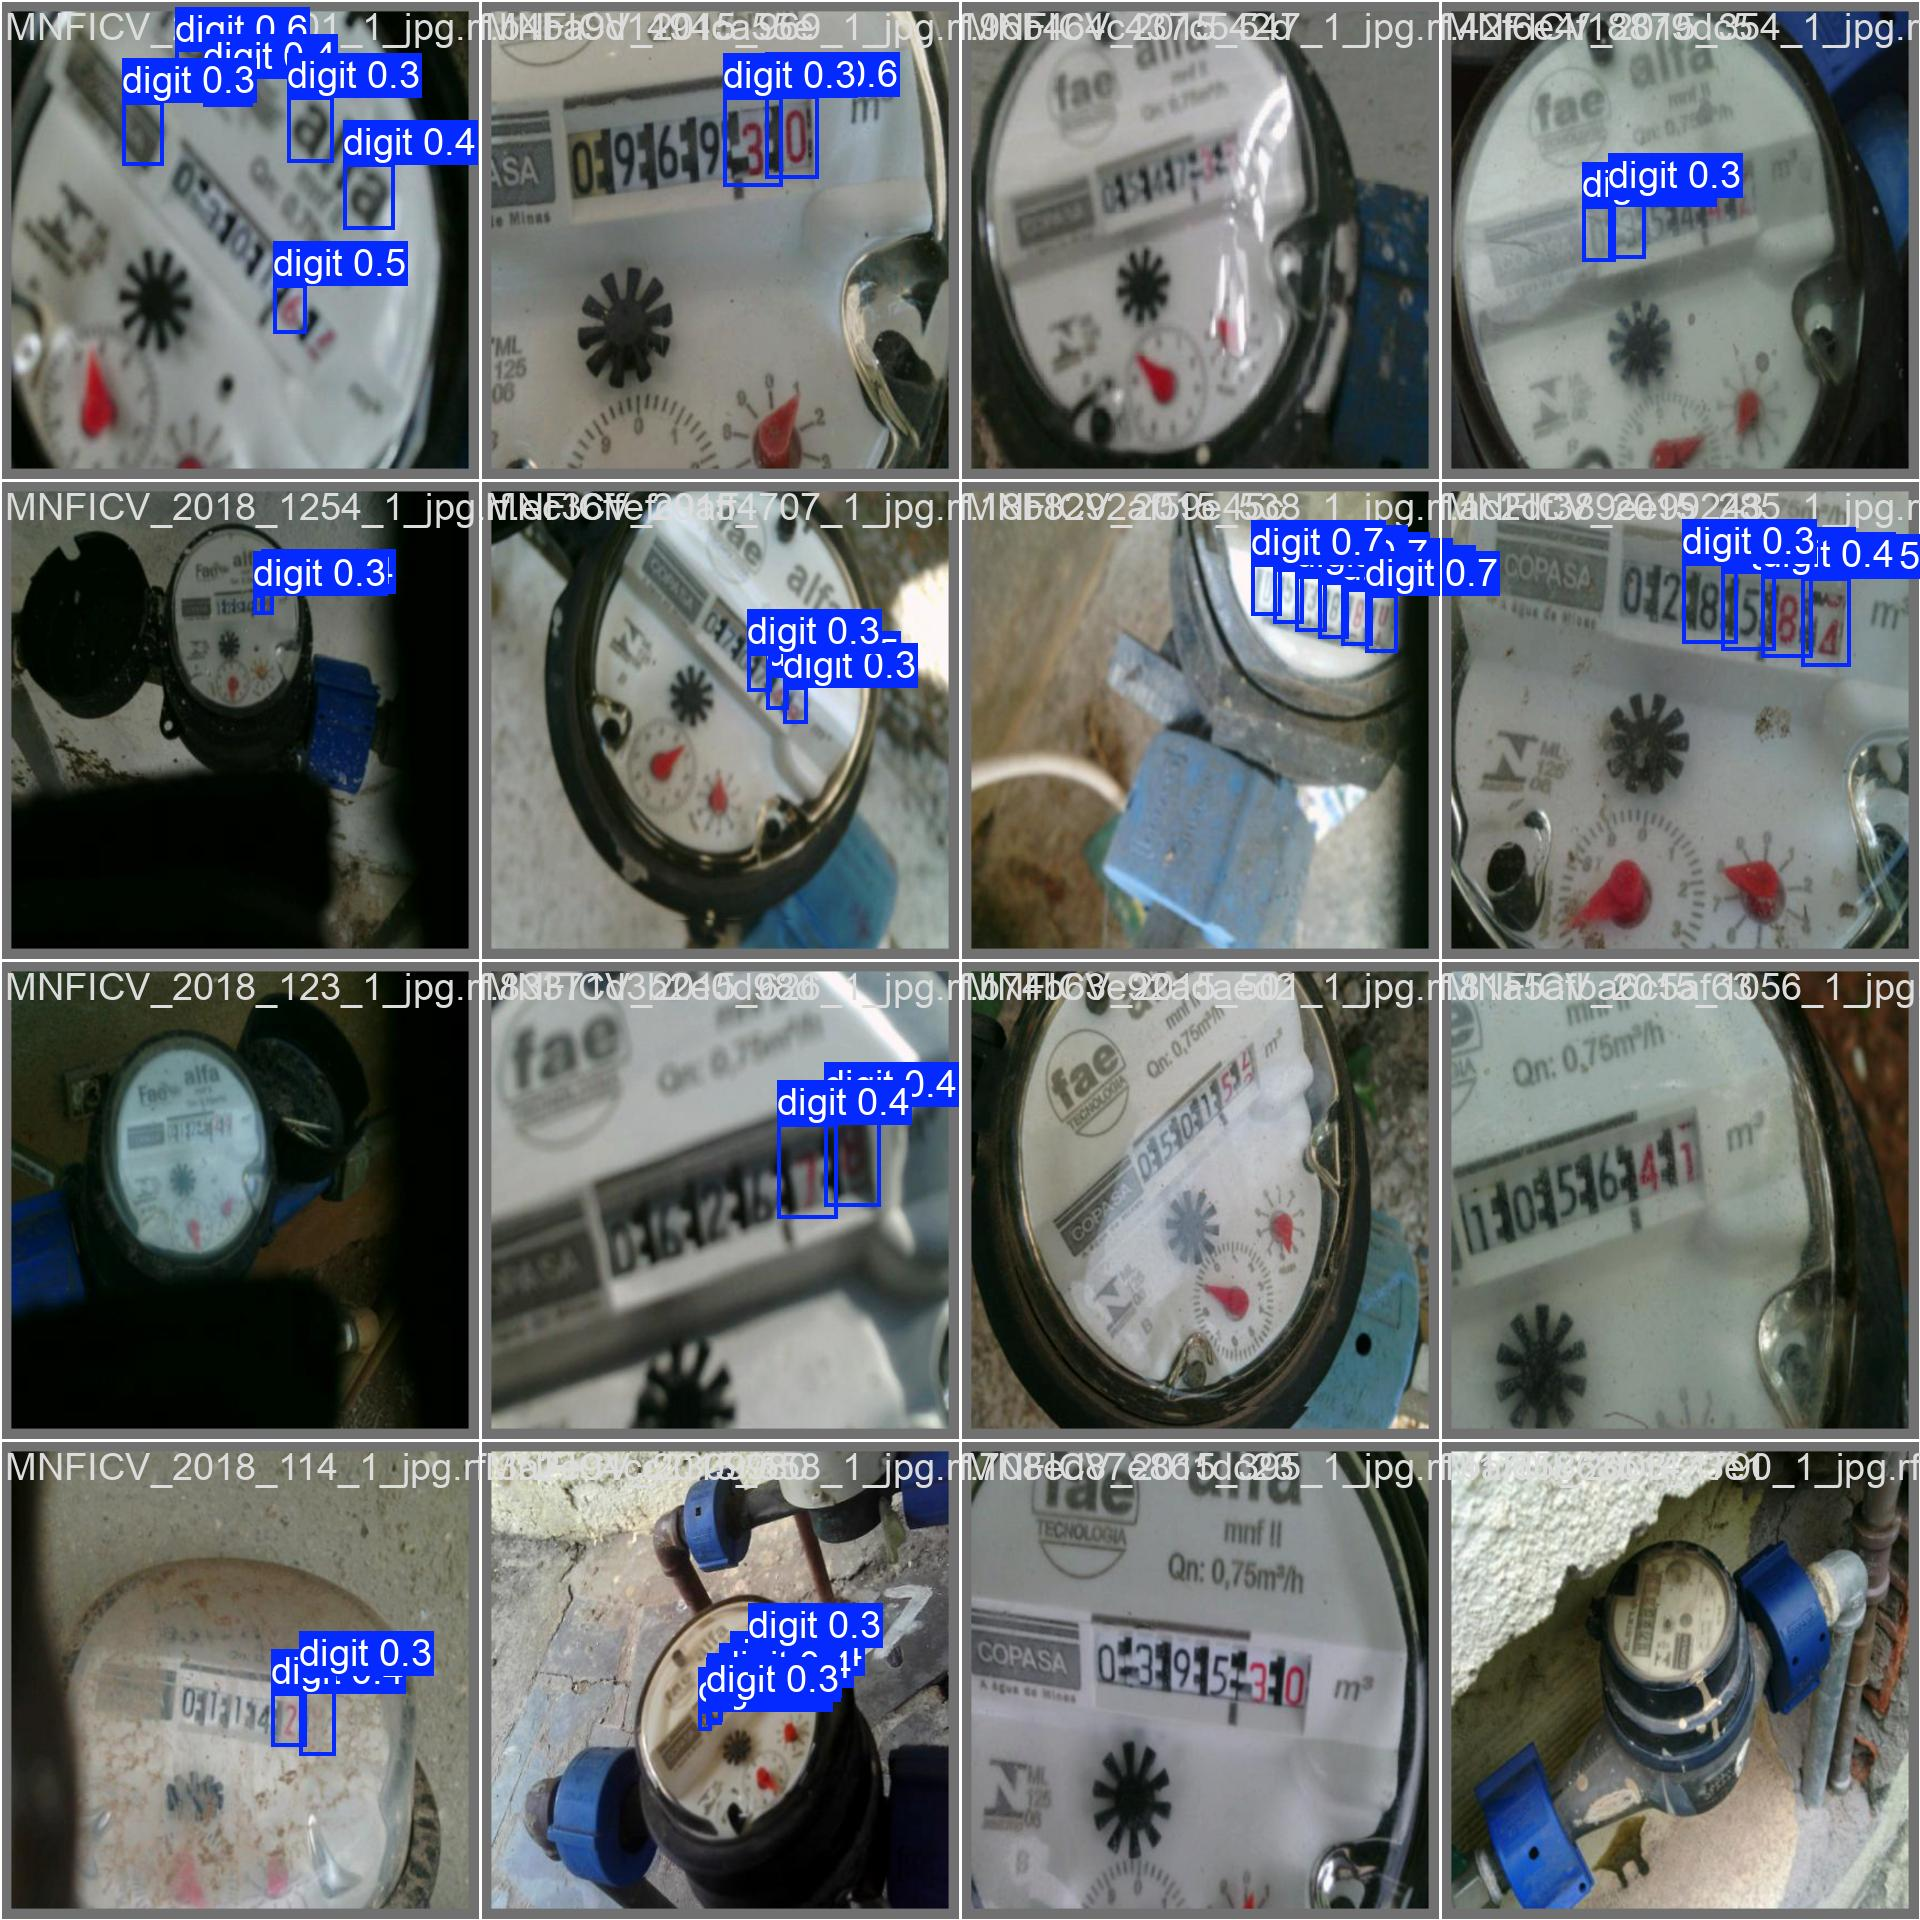

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=1000)

**Step # 06  Validate Fine-Tuned Model**

In [ ]:
model = YOLO("best.pt")  # load a custom model

# Validate the model
metrics = model.val(data=f'{dataset.location}/data.yaml')   # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

NameError: name 'dataset' is not defined

**Step # 08 Inference with Custom Model on Images**

In [ ]:
dataset.location

NameError: name 'dataset' is not defined

In [ ]:
results = model.predict(source = f"{dataset.location}/test/images", save = True)


image 1/480 /content/pascal-to-yolo-3/test/images/FLODIS3I_2012_654_1_jpg.rf.3c8362ca0fe0304285a414addb6ffc0a.jpg: 640x640 1 Protective Helmet, 33.6ms
image 2/480 /content/pascal-to-yolo-3/test/images/FLODIS3I_2013_3027_1_jpg.rf.1ea4ba1d440f24306b16a87770282b62.jpg: 640x640 (no detections), 27.8ms
image 3/480 /content/pascal-to-yolo-3/test/images/FLODIS3I_2013_4751_1_jpg.rf.42810fc85e0686bb10bf56e45b40fb0c.jpg: 640x640 1 Protective Helmet, 27.9ms
image 4/480 /content/pascal-to-yolo-3/test/images/FLODIS3I_2013_941_1_jpg.rf.231b860dda4e95240ae5ccefa59d899e.jpg: 640x640 2 Protective Helmets, 24.8ms
image 5/480 /content/pascal-to-yolo-3/test/images/FLODIS3_2011_2864_1_jpg.rf.e9366f4da1cf17e4b2d898fd34572868.jpg: 640x640 (no detections), 19.7ms
image 6/480 /content/pascal-to-yolo-3/test/images/FLODIS3_2011_7323_1_jpg.rf.0748bda2996f898b61cd871129f5b45d.jpg: 640x640 1 Glove, 24.1ms
image 7/480 /content/pascal-to-yolo-3/test/images/FLODIS3_2012_3124_1_jpg.rf.7bdbd99b25a646b30de263ebb39033cd.

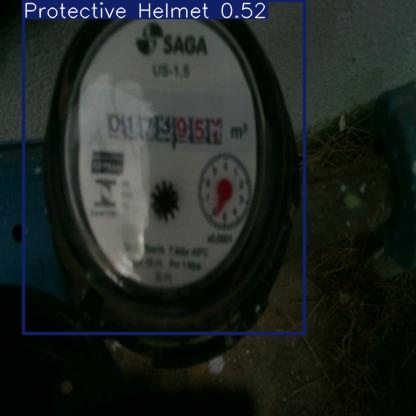

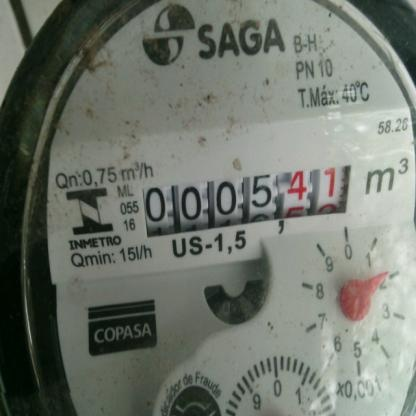

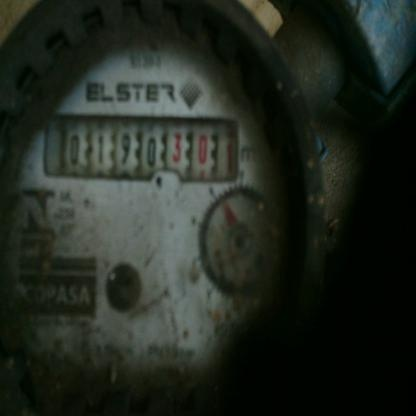

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[2:5]:
    display(IPyImage(filename=img, width=600))
    print("\n")